In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Téléchargement du df

In [ ]:
#Dataset Champs Elysées
raw_df = pd.read_csv(r'data\comptages-routiers-permanents-washington-filtered.csv', delimiter=';')

# Convertir la colonne en datetime et définir l'index
raw_df['Date et heure de comptage'] = pd.to_datetime(raw_df['Date et heure de comptage'], errors='coerce', utc=True)
raw_df.set_index('Date et heure de comptage', inplace=True)
raw_df.sort_index(inplace=True)

### Distribution des valeurs manquantes 'Débit horaire' est NaN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer les dates où 'Débit horaire' est NaN
nan_dates = raw_df.index[raw_df['Débit horaire'].isna()]  # Index contient les dates

# Convertir en série Pandas pour le traitement
nan_dates_series = pd.Series(nan_dates)

# Tracer un histogramme des fréquences des dates
plt.figure(figsize=(10, 6))
nan_dates_series.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogramme des dates où Débit horaire est NaN')
plt.xlabel('Dates')
plt.ylabel('Nombre de valeurs NaN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualisation de l'évolution du débit horaire et taux d'occupation sur un jour donné

In [ ]:
# Sélectionner la portion du DataFrame pour la période donnée
sept_debit_df = raw_df.loc['2023-12-17 00:00:00+00:00':'2023-12-17 23:00:00+00:00']


# Créer deux graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Graphique 1 : Débit horaire
axs[0].plot(sept_debit_df.index, sept_debit_df['Débit horaire'], label='Débit horaire', color='blue')
axs[0].set_title('Évolution du débit horaire')
axs[0].set_xlabel('Heure')
axs[0].set_ylabel('Débit')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format heure:minute
axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Tick toutes les heures
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True)
axs[0].legend()

# Graphique 2 : Taux d'occupation
axs[1].plot(sept_debit_df.index, sept_debit_df['Taux d\'occupation'], label='Taux d\'occupation', color='orange')
axs[1].set_title('Évolution du taux d\'occupation')
axs[1].set_xlabel('Heure')
axs[1].set_ylabel('Taux d\'occupation')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format heure:minute
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Tick toutes les heures
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)
axs[1].legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()


### Attribution à chaque heure une période de la journée

In [ ]:
# S'assurer que l'index est de type datetime
raw_df.index = pd.to_datetime(raw_df.index)

# Définir une fonction pour classer les périodes
def assigner_periode(hour):
    if 0 <= hour < 6:
        return "Nuit"
    elif 6 <= hour < 9:
        return "Matin calme"
    elif 9 <= hour < 12:
        return "Matinée"
    elif 12 <= hour < 16:
        return "Après-midi"
    elif 16 <= hour < 22:
        return "Soirée"
    else:
        return "Nuit tardive"

# Appliquer la fonction pour ajouter une colonne "Période"
raw_df['Période'] = raw_df.index.hour.map(assigner_periode)

# Afficher les premières lignes pour vérifier

raw_df.groupby('Période')["Taux d'occupation"].mean().plot(kind='bar', xlabel='Jour', ylabel="Taux d'occupation", color='skyblue', edgecolor='black', figsize=(10, 6))

In [ ]:
weather_df = pd.read_csv(r'data\cleaned_weather.csv', delimiter=',', index_col=2)

In [ ]:
# Convertir l'index en type datetime si ce n'est pas déjà fait
weather_df.index = pd.to_datetime(weather_df.index)
raw_df.index = pd.to_datetime(raw_df.index)

# Fonctions pour récupérer les données à partir de weather_df
def concat_prcp(date):
    return weather_df.loc[date, 'PRCP'] if date in weather_df.index else None

def concat_snwd(date):
    return weather_df.loc[date, 'SNWD'] if date in weather_df.index else None

def concat_tmax(date):
    return weather_df.loc[date, 'TMAX'] if date in weather_df.index else None

# Appliquer les fonctions pour ajouter des colonnes à raw_df
raw_df['PRCP'] = raw_df.index.map(lambda x: concat_prcp(x.strftime('%Y-%m-%d')))
raw_df['SNWD'] = raw_df.index.map(lambda x: concat_snwd(x.strftime('%Y-%m-%d')))
raw_df['TMAX'] = raw_df.index.map(lambda x: concat_tmax(x.strftime('%Y-%m-%d')))


### Nouveau df (4 nouvelles features : période, PRCP, SNWD et TMAX)

In [ ]:
# Afficher raw_df
raw_df.head(25)

In [ ]:
data = raw_df.copy()

data['year'] = data['Date et heure de comptage'].dt.year
data['month'] = data['Date et heure de comptage'].dt.month
data['day'] = data['Date et heure de comptage'].dt.day
data['hour'] = data['Date et heure de comptage'].dt.hour
data['day_of_week'] = data['Date et heure de comptage'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


KeyError: 'Date et heure de comptage'

In [ ]:
# Afficher raw_df
raw_df.head(25)

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,PRCP,SNWD,TMAX,Période
Date et heure de comptage,,,,,,,,,,,,,,,,,,
2023-11-01 03:00:00+00:00,4264,AV_Champs_Elysees,704.0,11.40389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Nuit
2023-11-01 04:00:00+00:00,4264,AV_Champs_Elysees,547.0,6.10722,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Nuit
2023-11-01 05:00:00+00:00,4264,AV_Champs_Elysees,635.0,14.22223,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Nuit
2023-11-01 06:00:00+00:00,4264,AV_Champs_Elysees,899.0,27.25778,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Matin calme
2023-11-01 07:00:00+00:00,4264,AV_Champs_Elysees,515.0,6.83000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Matin calme
2023-11-01 08:00:00+00:00,4264,AV_Champs_Elysees,513.0,7.98222,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Matin calme
2023-11-01 09:00:00+00:00,4264,AV_Champs_Elysees,731.0,11.26333,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Matinée
2023-11-01 10:00:00+00:00,4264,AV_Champs_Elysees,938.0,18.04667,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Matinée
2023-11-01 11:00:00+00:00,4264,AV_Champs_Elysees,1167.0,22.29556,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",0.01,0.0,58.0,Matinée


In [51]:
data = raw_df.copy()

data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Supprimer ou imputer les valeurs manquantes
data = data.dropna(subset=['Débit horaire', 'PRCP', 'SNWD', 'TMAX'])

data

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,...,PRCP,SNWD,TMAX,Période,year,month,day,hour,day_of_week,is_weekend
Date et heure de comptage,,,,,,,,,,,,,,,,,,,,,
2023-11-01 03:00:00+00:00,4264,AV_Champs_Elysees,704.0,11.40389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.01,0.0,58.0,Nuit,2023,11,1,3,2,0
2023-11-01 04:00:00+00:00,4264,AV_Champs_Elysees,547.0,6.10722,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.01,0.0,58.0,Nuit,2023,11,1,4,2,0
2023-11-01 05:00:00+00:00,4264,AV_Champs_Elysees,635.0,14.22223,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.01,0.0,58.0,Nuit,2023,11,1,5,2,0
2023-11-01 06:00:00+00:00,4264,AV_Champs_Elysees,899.0,27.25778,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.01,0.0,58.0,Matin calme,2023,11,1,6,2,0
2023-11-01 07:00:00+00:00,4264,AV_Champs_Elysees,515.0,6.83000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.01,0.0,58.0,Matin calme,2023,11,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26 14:00:00+00:00,4264,AV_Champs_Elysees,748.0,21.14834,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.44,0.0,51.0,Après-midi,2024,11,26,14,1,0
2024-11-26 22:00:00+00:00,4264,AV_Champs_Elysees,469.0,9.23000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.44,0.0,51.0,Nuit tardive,2024,11,26,22,1,0
2024-11-26 23:00:00+00:00,4264,AV_Champs_Elysees,545.0,9.98167,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,0.44,0.0,51.0,Nuit tardive,2024,11,26,23,1,0


In [52]:
# Caractéristiques pour l'entraînement
features = ['year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend', 'PRCP', 'SNWD', 'TMAX']
target = 'Débit horaire'

X = data[features]
y = data[target]


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialiser le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Évaluer sur l'ensemble de test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 13170.788099227799


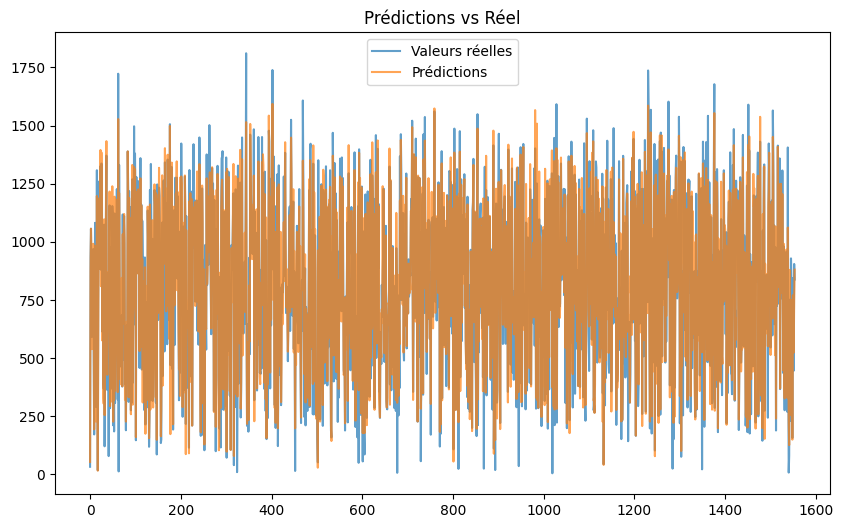

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valeurs réelles', alpha=0.7)
plt.plot(y_pred, label='Prédictions', alpha=0.7)
plt.legend()
plt.title('Prédictions vs Réel')
plt.show()


In [69]:
import numpy as np

# Date donnée
new_date = pd.to_datetime('2023-11-02 01:00:00')

# Extraire les caractéristiques
new_features = {
    'year': new_date.year,
    'month': new_date.month,
    'day': new_date.day,
    'hour': new_date.hour,
    'day_of_week': new_date.dayofweek,
    'is_weekend': 1 if new_date.dayofweek >= 5 else 0,
    'PRCP': 0.4,  # Exemple : précipitations
    'SNWD': 0.0,   # Exemple : neige
    'TMAX': 58.0   # Exemple : température max
}

# Convertir en DataFrame
new_features_df = pd.DataFrame([new_features])

# Prédire le débit
predicted_debit = model.predict(new_features_df)
print(f"Prédiction du débit horaire : {predicted_debit[0]}")
print(raw_df.loc['2023-11-02 15:00:00+00:00', 'Débit horaire'])


Prédiction du débit horaire : 827.86
nan
